In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train['source']='train'
test['source']='test'
df_big=pd.concat([train,test],ignore_index=True)
df_big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


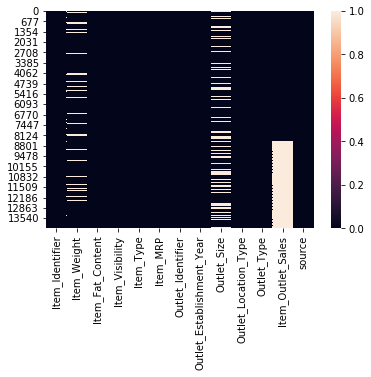

In [3]:
#checking for any missing data
sns.heatmap(df_big.isnull())

In [4]:
#there are missing values in Item_weight and Outlet_size
#Item_outlet_sales also has missing data which is due to no data in test file

In [5]:
df_big.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [6]:
df_big.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#Item visibility of 0 makes no sense, as any item that is sold, have to visible

In [8]:
df_big.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [9]:
for i in ['Item_Type','Outlet_Size','Outlet_Location_Type','Item_Fat_Content','Outlet_Type']:
    print(df_big[i].value_counts())

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [10]:
#in Item_Fat_Content, some Low Fat items are miscoded as LF anf low fat, Regular as reg

In [11]:
#Replacing missing values
df_big['Item_Weight']=df_big['Item_Weight'].replace(np.NaN,df_big["Item_Weight"].mean())

In [12]:
df_big["Outlet_Size"].mode()

0    Medium
dtype: object

In [13]:
df_big['Outlet_Size']=df_big['Outlet_Size'].replace(np.NaN,'Medium')

In [14]:
df_big.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [15]:
#Modyfying Item_Visibility
df_big['Item_Visibility']=df_big['Item_Visibility'].replace(0,df_big["Item_Visibility"].mean())

In [16]:
df_big['Item_Visibility'].describe()

count    14204.000000
mean         0.070034
std          0.048602
min          0.003575
25%          0.033143
50%          0.062347
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [17]:
#Using the Item_Identifier data first to Letters as an Item type identifier to form a new attribute Item_Type_Combined
df_big['Item_Type_Combined'] = df_big['Item_Identifier'].apply(lambda x: x[0:2])
df_big['Item_Type_Combined'] = df_big['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df_big['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [18]:
#Finding the no. of years the establishment is open for,makes more sense than only Outlet_Establishment _Year
df_big['Outlet_Years'] = 2013 - df_big['Outlet_Establishment_Year']
df_big['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [19]:
#Replacing the miscoded Item_Fat_Content values
print(df_big['Item_Fat_Content'].value_counts())
df_big['Item_Fat_Content'] = df_big['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(df_big['Item_Fat_Content'].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [20]:
#Refering to Non-Consumable Item_Type_Combined column items,replacing corresponding Item_Fat_Content items as Non-Edible
df_big.loc[df_big['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_big['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [21]:
df_big.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Item_Type_Combined            object
Outlet_Years                   int64
dtype: object

In [22]:
#Cheking the skewness of data
df_big.skew()
# From below ouput, we can say Item_Visibility and Item_Outlet_Sales have high skewness

Item_Weight                  0.111314
Item_Visibility              1.320683
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.177531
Outlet_Years                 0.396465
dtype: float64

In [23]:
#removing skewness using log transform
df_big["Item_Visibility"]=np.log1p(df_big['Item_Visibility'])
df_big["Item_Outlet_Sales"]=np.log1p(df_big['Item_Outlet_Sales'])

In [24]:
df_big.skew()
#skewmess is reduced

Item_Weight                  0.111314
Item_Visibility              1.159801
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales           -0.882266
Outlet_Years                 0.396465
dtype: float64

In [25]:
#Dropping unnecessary attributes
df_big.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier'],axis=1,inplace=True)

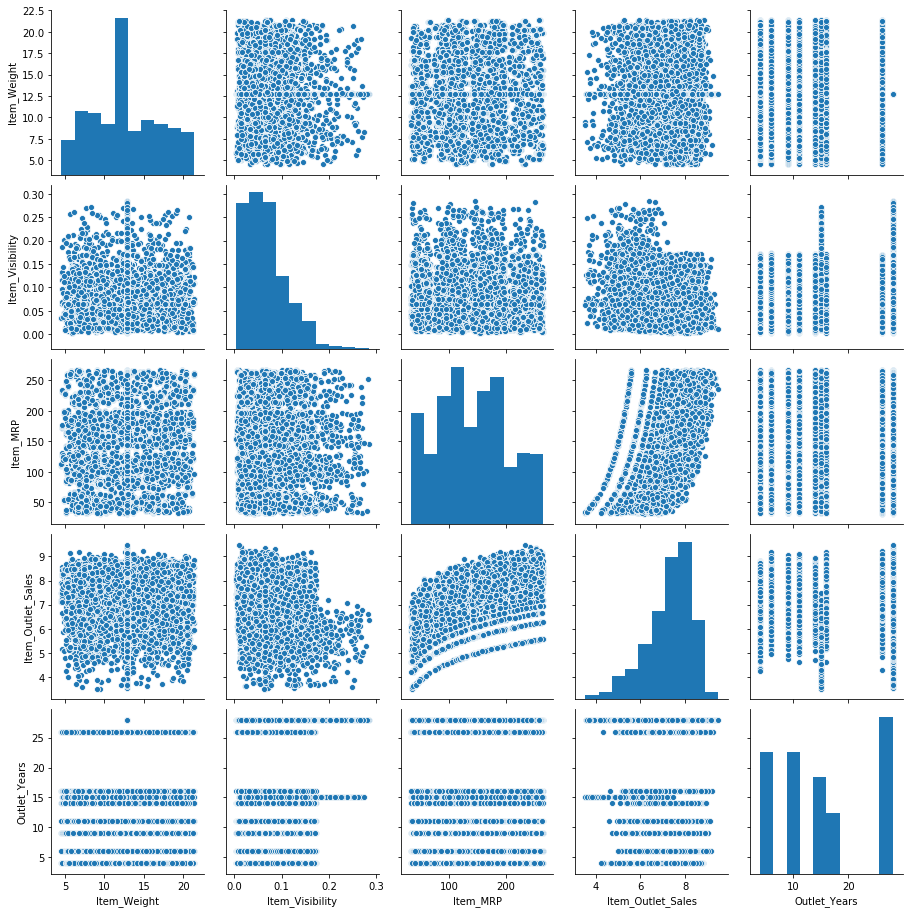

In [26]:
sns.pairplot(df_big)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']:
    df_big[i] = le.fit_transform(df_big[i])

In [27]:
df_big.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
0,9.30,0,0.015920,249.8092,9,1,0,1,8.225808,train,1,14
1,5.92,2,0.019095,48.2692,3,1,2,2,6.096776,train,0,4
2,17.50,0,0.016621,141.6180,9,1,0,1,7.648868,train,1,14
3,19.20,2,0.063869,182.0950,0,1,2,0,6.597664,train,1,15
4,8.93,1,0.063869,53.8614,1,0,2,1,6.903451,train,2,26


In [28]:
df_big.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_MRP                float64
Outlet_Identifier         int32
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
source                   object
Item_Type_Combined        int32
Outlet_Years              int64
dtype: object

In [29]:
#Divide into test and train:
train = df_big.loc[df_big['source']=="train"]
test = df_big.loc[df_big['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [30]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(train))
print(zscore)
print(np.where(zscore>3))
train=train[(zscore<3).all(axis=1)]

[[0.83922588 0.99781318 1.14749538 ... 0.91409419 0.17979501 0.13954076]
 [1.63904672 1.23694223 1.07595834 ... 1.18315988 2.09528612 1.33410274]
 [1.10116786 0.99781318 1.13169402 ... 0.34576615 0.17979501 0.13954076]
 ...
 [0.53160248 0.11956453 0.72700604 ... 0.20952913 1.73569609 0.73682175]
 [1.33378966 1.23694223 1.54913332 ... 0.2199048  0.17979501 1.33410274]
 [0.46225773 0.99781318 0.51702549 ... 0.64601847 2.09528612 0.09937163]]
(array([  49,   83,  108,  174,  178,  255,  405,  430,  434,  446,  489,
        502,  521,  532,  540,  574,  828,  854,  906,  920, 1159, 1272,
       1291, 1311, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651,
       1805, 1827, 1841, 1913, 2055, 2088, 2122, 2251, 2324, 2324, 2337,
       2394, 2439, 2445, 2571, 2586, 2613, 2728, 2855, 2895, 3017, 3053,
       3163, 3206, 3247, 3283, 3301, 3399, 3408, 3458, 3474, 3488, 3497,
       3540, 3702, 3750, 3767, 3884, 3940, 3993, 4006, 4219, 4219, 4265,
       4280, 4297, 4350, 4382, 4408, 4530, 4

In [31]:
#separating into input and output variables
x=train.drop(["Item_Outlet_Sales"],axis=1)

y=train["Item_Outlet_Sales"]


In [32]:
#checking the shape
x.shape

(8372, 10)

In [33]:
y.shape

(8372,)

In [34]:
y=pd.DataFrame(y)
y.shape

(8372, 1)

In [35]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [36]:
x.skew()

0    0.097401
1    0.214731
2    0.793146
3    0.125862
4   -0.071907
5   -0.080691
6   -0.215260
7    0.960445
8    0.113652
9    0.416305
dtype: float64

In [37]:
print(x.dtypes)
print(y.dtypes)

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object
Item_Outlet_Sales    float64
dtype: object


In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.40)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [39]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.5579474394449044
r2 score corresponding to 43 is 0.5521485691965877
r2 score corresponding to 44 is 0.546773094039241
r2 score corresponding to 45 is 0.5494722183128214
r2 score corresponding to 46 is 0.5579824554408277
r2 score corresponding to 47 is 0.5634880382120657
r2 score corresponding to 48 is 0.567764854322761
r2 score corresponding to 49 is 0.5664288400124822
r2 score corresponding to 50 is 0.5578535028271954
r2 score corresponding to 51 is 0.5428541130093614
r2 score corresponding to 52 is 0.5498302871545493
r2 score corresponding to 53 is 0.5632424696358611
r2 score corresponding to 54 is 0.5652666166489421
r2 score corresponding to 55 is 0.5641737148891615
r2 score corresponding to 56 is 0.5696106213300505
r2 score corresponding to 57 is 0.5749838563515501
r2 score corresponding to 58 is 0.5733568717685018
r2 score corresponding to 59 is 0.5723620431040958
r2 score corresponding to 60 is 0.5562554002980773
r2 score corresponding to 61 is 0

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 17}

In [41]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=17)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.6613411971836956
r2 score corresponding to 43 is 0.6556724495729531
r2 score corresponding to 44 is 0.6434562257163166
r2 score corresponding to 45 is 0.6664312861594361
r2 score corresponding to 46 is 0.656730049037839
r2 score corresponding to 47 is 0.6716559735501534
r2 score corresponding to 48 is 0.6725547584275111
r2 score corresponding to 49 is 0.6703272431543899
r2 score corresponding to 50 is 0.6568093871032931
r2 score corresponding to 51 is 0.660940440124168
r2 score corresponding to 52 is 0.646521469434141
r2 score corresponding to 53 is 0.6735519511902535
r2 score corresponding to 54 is 0.6662409777076885
r2 score corresponding to 55 is 0.6722905229692394
r2 score corresponding to 56 is 0.6702613097396682
r2 score corresponding to 57 is 0.6738776163060953
r2 score corresponding to 58 is 0.654638884640433
r2 score corresponding to 59 is 0.6854163485782125
r2 score corresponding to 60 is 0.6615504235192446
r2 score corresponding to 61 is 0.6

In [42]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression: 0.5612130748506454
Standard Deviation in r2 score for Linear Regression: 0.01457695087576317

Mean r2 score for KNN Regression: 0.6681077933192611
Standard Deviation in r2 score for KNN Regression: 0.013584917763465423


In [43]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [44]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.5578976194326493
r2 score corresponding to 43 is 0.5522792963982233
r2 score corresponding to 44 is 0.5468646072931467
r2 score corresponding to 45 is 0.5494643966534969
r2 score corresponding to 46 is 0.5578537932150769
r2 score corresponding to 47 is 0.563443990160395
r2 score corresponding to 48 is 0.5675050511266628
r2 score corresponding to 49 is 0.5663728836667274
r2 score corresponding to 50 is 0.5578579038804484
r2 score corresponding to 51 is 0.542800911541848
r2 score corresponding to 52 is 0.5499306786161231
r2 score corresponding to 53 is 0.563186770939101
r2 score corresponding to 54 is 0.5652456578145308
r2 score corresponding to 55 is 0.5642455858288093
r2 score corresponding to 56 is 0.5696202695095154
r2 score corresponding to 57 is 0.5749587732648884
r2 score corresponding to 58 is 0.5733891717251105
r2 score corresponding to 59 is 0.5722237827004605
r2 score corresponding to 60 is 0.5563393722929396
r2 score corresponding to 61 is 0.

In [45]:
#Using cross val score with Lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.5612076440891876
Standard Deviation in r2 score for Lasso Regression: 0.014448668636532283


In [50]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [51]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.5578976194326493
r2 score corresponding to 43 is 0.5522792963982233
r2 score corresponding to 44 is 0.5468646072931467
r2 score corresponding to 45 is 0.5494643966534969
r2 score corresponding to 46 is 0.5578537932150769
r2 score corresponding to 47 is 0.563443990160395
r2 score corresponding to 48 is 0.5675050511266628
r2 score corresponding to 49 is 0.5663728836667274
r2 score corresponding to 50 is 0.5578579038804484
r2 score corresponding to 51 is 0.542800911541848
r2 score corresponding to 52 is 0.5499306786161231
r2 score corresponding to 53 is 0.563186770939101
r2 score corresponding to 54 is 0.5652456578145308
r2 score corresponding to 55 is 0.5642455858288093
r2 score corresponding to 56 is 0.5696202695095154
r2 score corresponding to 57 is 0.5749587732648884
r2 score corresponding to 58 is 0.5733891717251105
r2 score corresponding to 59 is 0.5722237827004605
r2 score corresponding to 60 is 0.5563393722929396
r2 score corresponding to 61 is 0.

In [52]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.5612136211555188
Standard Deviation in r2 score for Ridge Regression: 0.014572165749780513


In [47]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [49]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.7110739779707345
Standard Deviation in r2 score for Gradient Boosting Regression: 0.010205761971968257


In [56]:
#checking max r2 score corresponding to GradientBoost
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.7064300780533352
r2 score corresponding to 43 is 0.7012664439608237
r2 score corresponding to 44 is 0.6923906403835609
r2 score corresponding to 45 is 0.709173594794558
r2 score corresponding to 46 is 0.7070213604718856
r2 score corresponding to 47 is 0.7126896456453435
r2 score corresponding to 48 is 0.7152796340065398
r2 score corresponding to 49 is 0.712121350859038
r2 score corresponding to 50 is 0.7084564521637384
r2 score corresponding to 51 is 0.7053025184952018
r2 score corresponding to 52 is 0.7002981095809242
r2 score corresponding to 53 is 0.724086899306901
r2 score corresponding to 54 is 0.7169257555857917
r2 score corresponding to 55 is 0.7141141257332728
r2 score corresponding to 56 is 0.7178529679533716
r2 score corresponding to 57 is 0.7198726715062744
r2 score corresponding to 58 is 0.7130900072359297
r2 score corresponding to 59 is 0.7284745942482742
r2 score corresponding to 60 is 0.7077293555085669
r2 score corresponding to 61 is 0.

In [53]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.001,
 'n_estimators': 500}

In [54]:
dtr=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor(base_estimator=dtr,learning_rate=.001,n_estimators=500)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.6467988063207664
Standard Deviation in r2 score for Ada Boost Regression: 0.009588341434256945


In [55]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.6330957763297493
r2 score corresponding to 43 is 0.6434026370115388
r2 score corresponding to 44 is 0.6312595649779773
r2 score corresponding to 45 is 0.654989862291067
r2 score corresponding to 46 is 0.6537062207603781
r2 score corresponding to 47 is 0.6495489398057989
r2 score corresponding to 48 is 0.6590055564400801
r2 score corresponding to 49 is 0.6550144869646275
r2 score corresponding to 50 is 0.6501206204349563
r2 score corresponding to 51 is 0.6394914537784085
r2 score corresponding to 52 is 0.6412585052762318
r2 score corresponding to 53 is 0.6629371571325879
r2 score corresponding to 54 is 0.6542254067494334
r2 score corresponding to 55 is 0.6475923335327933
r2 score corresponding to 56 is 0.6607843908397812
r2 score corresponding to 57 is 0.6583591834832343
r2 score corresponding to 58 is 0.6485857863035993
r2 score corresponding to 59 is 0.6629359044848749
r2 score corresponding to 60 is 0.6391421496584888
r2 score corresponding to 61 is 

In [57]:
#We tried all methods and till now Gradient Boosting Regression is the best

In [58]:
#Random state corresponding to highest r2 score is 59
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=59,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [59]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.5174196414410681
r2 score is: 0.7286778388579255


In [61]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(gbr,"bigmart_gbr.pkl")

['bigmart_gbr.pkl']